<h1 align="center">Final Assignment</h1> 

<h3 align="right">Tarun Varma, Bharath Gopal</h3> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
pd.options.display.max_colwidth = 1000
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
df = pd.read_csv("X_train.csv")
df.shape

(40000, 1)

In [3]:
import re

def pre_processing(df):
    #Copy the original review for future reference
    df["og_review"] = df["review"]
    #Remove the unnecessary html text 
    df['review'] = df['review'].str.replace('<br />', '')
    #Remove punctuations with empty string or space accordingly
    pattern1 = r"[,'\":;()\[\]\{\}\—\*]"
    df['review'] = df['review'].apply(lambda x: re.sub(pattern1, '', x))
    pattern2 = r"[./!?\-]"
    df['review'] = df['review'].apply(lambda x: re.sub(pattern2, ' ', x))
    #Make text lower case
    df['review'] = df['review'].apply(lambda x: x.lower())
    return df

In [4]:
def feature_engineering(df, pos_words, neg_words):
    #Add positive count and negative count to the data
    df['pos_count'] = [sum(review.count(word) for word in pos_words) for review in df['review']]
    df['neg_count'] = [sum(review.count(word) for word in neg_words) for review in df['review']]
    return df

In [5]:
pos_words = ['amazing', 'beautiful', 'beautifully', 'classic', 'enjoyed', 'excellent', 'exciting', 'fantastic', 'fascinating', 'gift', 'love', 'loved', 'lovely', 'refreshing',  'superb', 'terrifying', 'touching', 'wonderful']
neg_words = ['annoying', 'awful', 'bad', 'boring', 'cheesy', 'disappointing', 'disconnected', 'drag', 'flaw', 'garbage', 'grotesque', 'horrible', 'insulting', 'irritating', 'lame', 'major problems', 'miscasting', 'mistake', 'pathetic', 'poor', 'predictability', 'ruined', 'spoils', 'terrible', 'tedious', 'tired', 'unconvincing', 'waste', 'weakness', 'wrong', 'worst', 'yuck']

In [6]:
df = pre_processing(df)
df = feature_engineering(df, pos_words, neg_words)

In [7]:
df.sample()

,review,og_review,pos_count,neg_count
34840,isaac florentine has made some of the best western martial arts action movies ever produced in particular us seals 2 cold harvest special forces and undisputed 2 are all action classics you can tell isaac has a real passion for the genre and his films are always eventful creative and sharp affairs with some of the best fight sequences an action fan could hope for in particular he has found a muse with scott adkins as talented an actor and action performer as you could hope for this is borne out with special forces and undisputed 2 but unfortunately the shepherd just doesnt live up to their abilities there is no doubt that jcvd looks better here fight wise than he has done in years especially in the fight he has for pretty much no reason in a prison cell and in the final showdown with scott but look in his eyes jcvd seems to be dead inside theres nothing in his eyes at all its like he just doesnt care about anything throughout the whole film and this is the leading man there...,"Isaac Florentine has made some of the best western Martial Arts action movies ever produced. In particular US Seals 2, Cold Harvest, Special Forces and Undisputed 2 are all action classics. You can tell Isaac has a real passion for the genre and his films are always eventful, creative and sharp affairs, with some of the best fight sequences an action fan could hope for. In particular he has found a muse with Scott Adkins, as talented an actor and action performer as you could hope for. This is borne out with Special Forces and Undisputed 2, but unfortunately The Shepherd just doesn't live up to their abilities.<br /><br />There is no doubt that JCVD looks better here fight-wise than he has done in years, especially in the fight he has (for pretty much no reason) in a prison cell, and in the final showdown with Scott, but look in his eyes. JCVD seems to be dead inside. There's nothing in his eyes at all. It's like he just doesn't care about anything throughout the whole film. And th...",1,0


### Building pipelines

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

pipeline = Pipeline([
    ('preprocess', ColumnTransformer(
        [('text', TfidfVectorizer(), 'review'), 
         ('nums', StandardScaler(), ['pos_count', 'neg_count'])])),
    ('cluster', KMeans(n_clusters=2, random_state=42))
])

In [9]:
labels_p1 = pipeline.fit_predict(df.loc[:, df.columns != 'og_review'])
clusters_p1 = labels_p1

### Evaluating this model

In [10]:
y = pd.read_csv("y_train.csv")

In [11]:
from sklearn.metrics import accuracy_score, precision_score

acc_score = accuracy_score(clusters_p1, y['sentiment'])
if acc_score <0.5:
    print("Accuracy on training:", 1 - acc_score)
else:
    print(f"Accuracy on training: ", acc_score)

Accuracy on training: 0.64935


In [12]:
X_test = pd.read_csv("X_final.csv")
y_test = pd.read_csv("y_final.csv")

In [13]:
X_test = pre_processing(X_test)
X_test = feature_engineering(X_test, pos_words, neg_words)

test_labels_p1 = pipeline.fit_predict(X_test.loc[:, X_test.columns != 'og_review'])
test_clusters_p1 = test_labels_p1

In [14]:
acc_score = accuracy_score(test_clusters_p1, y_test['sentiment'])
if acc_score <0.5:
    print("Accuracy on test:", 1 - acc_score)
else:
    print(f"Accuracy on test: ", acc_score)

Accuracy on test:  0.5856


### Trying this with SVD

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer

pipeline_PCA = Pipeline([
    ('preprocess', ColumnTransformer(
        [('text', TfidfVectorizer(), 'review'), 
         ('nums', StandardScaler(), ['pos_count', 'neg_count'])])),
    ('svd', TruncatedSVD(n_components=100)),
    ('cluster', KMeans(n_clusters=2, random_state=42))
])

In [16]:
labels_p2 = pipeline_PCA.fit_predict(df.loc[:, df.columns != 'og_review'])
clusters_p2 = labels_p2

In [17]:
acc_score = accuracy_score(clusters_p2, y['sentiment'])
if acc_score <0.5:
    print("Accuracy on training:", 1 - acc_score)
else:
    print(f"Accuracy on training: ", acc_score)

Accuracy on training: 0.64935


So,we can see that performing SVD on the data does not really affect it, and is thus unnecessary

### Trying with aglomerative clustering

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from sklearn.compose import ColumnTransformer

pipeline_ag = Pipeline([
    ('preprocess', ColumnTransformer(
        [('text', TfidfVectorizer(), 'review'), 
         ('nums', StandardScaler(), ['pos_count', 'neg_count'])])),
    ('svd', TruncatedSVD(n_components=2)),  # Use TruncatedSVD for sparse input
    ('cluster', AgglomerativeClustering(n_clusters=2))
])

In [19]:
labels_ag = pipeline_ag.fit_predict(df.loc[:, df.columns != 'og_review'])
clusters_ag = labels_ag

In [20]:
acc_score = accuracy_score(clusters_ag, y['sentiment'])
if acc_score <0.5:
    print("Accuracy on training:", 1 - acc_score)
else:
    print(f"Accuracy on training: ", acc_score)

Accuracy on training:  0.5849


### Using just the numerical data

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def cluster_num_data(df):
    temp = df[["pos_count", "neg_count"]]
    scaler = StandardScaler()
    num_cols = ['pos_count', 'neg_count']
    temp[num_cols] = scaler.fit_transform(temp[num_cols])
    km = KMeans(n_clusters=2, random_state=66)
    labels_num = km.fit_predict(temp)
    clusters_num = labels_num
    return temp, clusters_num

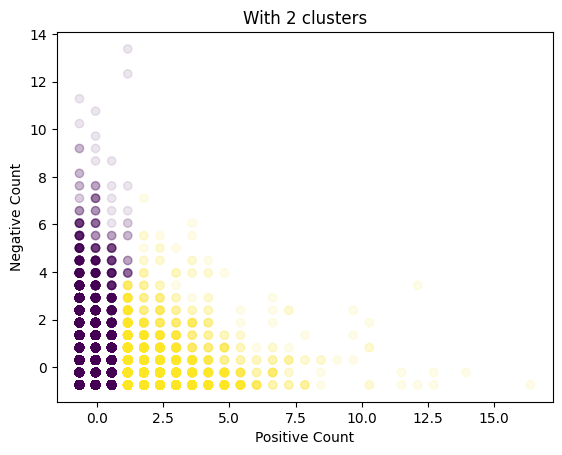

In [22]:
temp, clusters_num = cluster_num_data(df)
plt.scatter(temp["pos_count"], temp["neg_count"], c=clusters_num, alpha = 0.1)
plt.xlabel('Positive Count')
plt.ylabel('Negative Count')
plt.title("With 2 clusters")
plt.show()

From the above graph, we can see the issue with using k-means. Instead, if we were to simply plot a line at 45 degrees over this plot, and mark every point above the line as negative, and below the line as positive, we would get a much better result

The first instinct is to plot a x=y line. However, as the usage of this model will be to show just positive reviews, it's better to be safer. So, we should lower the angle of the line, to make sure we are only including positives. 

Since the max value of positive count is 15, and for negative it is 12. So we can use the line, y = 4/5*x

### Predicting without a model

In [23]:
def predict_on_count(df):
    temp = df[["pos_count", "neg_count"]]
    scaler = StandardScaler()
    num_cols = ['pos_count', 'neg_count']
    temp[num_cols] = scaler.fit_transform(temp[num_cols])
    temp['predicted_label'] = (4*temp['pos_count'] > 5*temp['neg_count'] ).astype(int)
    return temp, temp['predicted_label'].tolist()

In [24]:
temp_train, count_labels = predict_on_count(df)

In [25]:
acc_score = accuracy_score(count_labels, y['sentiment'])
print(f"Accuracy score on training:", acc_score)

Accuracy score on training: 0.751425


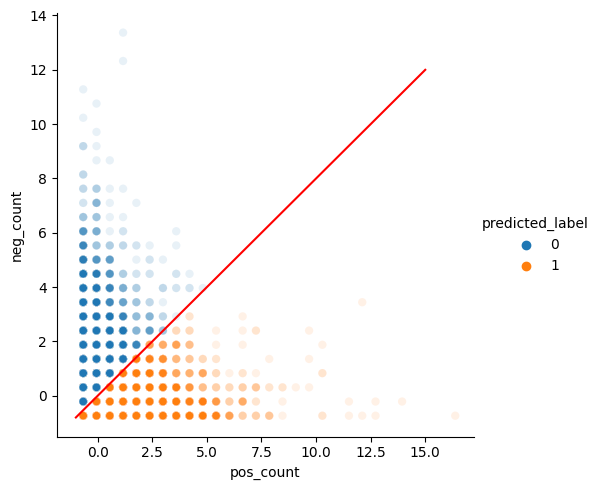

In [26]:
import seaborn as sns
a = np.linspace(-1,15,100)
b = 0.8*a
sns.relplot(x='pos_count', y='neg_count', hue = 'predicted_label', data=temp_train, alpha = 0.1)
plt.plot(a, b, '-r')
plt.show()

### Evaluating on test set

In [27]:
temp_test, test_labels = predict_on_count(X_test)
acc_score = accuracy_score(test_labels, y_test['sentiment'])
if acc_score <0.5:
    print("Accuracy on training:", 1 - acc_score)
else:
    print(f"Accuracy on training: ", acc_score)

Accuracy on training:  0.7499


In [28]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(test_labels, y_test['sentiment'])
recall = recall_score(test_labels, y_test['sentiment'])

print('Precision:', precision)
print('Recall:', recall)

Precision: 0.839
Recall: 0.7121032082838228


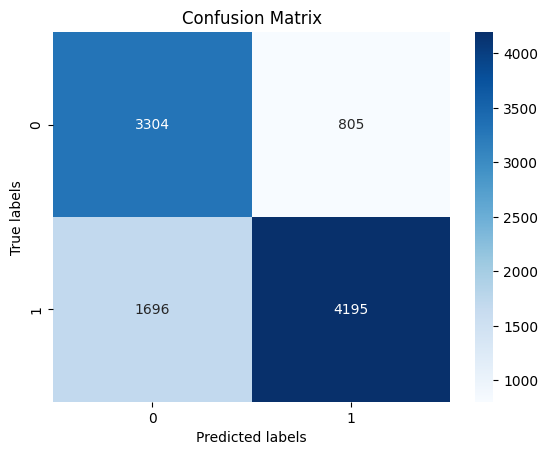

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, y_test['sentiment'])

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Visually going through these ourselves

In [33]:
df.iloc[temp_train.loc[temp_train["predicted_label"] == 1].sample().index[0]]["og_review"]

'And look how a true story, "... with a little help of it\'s friends..." : a welldone and touching script, a good directing and a surprising great acting from a bunch of "no-name" actors, especially from the 4-yr-old Jodelle Ferland, becomes a must seen movie. 9/10'

In [34]:
df.iloc[temp_train.loc[temp_train["predicted_label"] == 1].sample().index[0]]["og_review"]

'Having not read the novel, I can\'t tell how faithful this film is. The story is typical mystery material: killer targets newlyweds; woman investigator falls in love with her partner and is diagnosed with a fatal disease. Yes, it sounds like a soap opera and that\'s exactly how it plays. The first 2/3 are dull, save for the murders and the last 1/3 makes a partial comeback as it picks up speed toward its twisty conclusion.<br /><br />Acting is strictly sub par, though it\'s hard to blame the actors alone: the screenplay is atrocious. During the last 1/3 you stop noticing because the film actually becomes interesting, but that\'s only the last 1/3. Director Russell Mulcahy is very much in his element, but there\'s only so much he can do with a TV budget and the network censors on his back. He\'s pretty much limited to quick cutting and distorted lenses, though he managed to squeeze in a couple "under the floor" shots during the murders in the club restroom. Unfortunately, as this is ma

In [35]:
df.iloc[temp_train.loc[temp_train["predicted_label"] == 1].sample().index[0]]["og_review"]

"In Tweety's S.O.S, Sylvester goes from picking garbage cans to being a stowaway on a cruise ship that happens to carry a certain canary bird-and Granny, his owner. Uh-Oh! Once again, Tweety and Granny provide many obstacles to the cat's attempts to get the bird. Sylvester also gets seasick quite a few times, too. And the second time the red-nosed feline goes to the place on the ship that has something that cures his ailments, Tweety replaces it with nitroglycerin. So now Sylvester can blow fire! I'll stop here and say this is another excellent cartoon directed by Friz Freling starring the popular cat-and-bird duo. Tweety's S.O.S is most highly recommended."

### Conclusion

#### We used K-means, with and without SVD (100 components). We then tried using Agglomerative clustering. Given the large size of the data after performing TFIDF vectorization, we felt the text data was diluting the importance of the numerical features. So, we ran it again through k-means using just the numerical columns. On looking at the clusters, we decided that a better approach was to manually draw the decision boundary ourselves. 

#### We decided that precision is the most important metric, as in a real world setting, we would like to reduce the number of False Positives. 